In [1]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random

%matplotlib inline

/home/outtoin/.pyenv/versions/3.6.2/envs/statistics-3.6.2/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
np.random.seed(1)

### 1-Sample T-test

In [3]:
heights = [180 + np.random.normal(0, 5) for _ in range(20)]

tTestResult = stats.ttest_1samp(heights, 175)

In [4]:
print("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)

The T-statistic is 3.435 and the p-value is 0.003


### Unpaired T-test

In [5]:
group1height = [170 + np.random.normal(0, 5) for _ in range(20)]
group2height = [175 + np.random.normal(0, 10) for _ in range(20)]
group3height = [169 + np.random.normal(0, 10) for _ in range(20)]

tTestResult12 = stats.ttest_ind(group1height, group2height)
tTestResult12DiffVar = stats.ttest_ind(group1height, group2height, equal_var=False)

tTestResult13 = stats.ttest_ind(group1height, group3height)
tTestResult13DiffVar = stats.ttest_ind(group1height, group3height, equal_var=False)

print("The T-statistic and p-value between 1 and 2 assuming equal variances is %.3f and %.3f" % tTestResult12)
print("The T-statistic and p-value between 1 and 2 not assuming equal variances is %.3f and %.3f" % tTestResult12DiffVar)

print("The T-statistic and p-value between 1 and 3 assuming equal variances is %.3f and %.3f" % tTestResult13)
print("The T-statistic and p-value between 1 and 3 not assuming equal variances is %.3f and %.3f" % tTestResult13DiffVar)

The T-statistic and p-value between 1 and 2 assuming equal variances is -3.503 and 0.001
The T-statistic and p-value between 1 and 2 not assuming equal variances is -3.503 and 0.002
The T-statistic and p-value between 1 and 3 assuming equal variances is -0.379 and 0.707
The T-statistic and p-value between 1 and 3 not assuming equal variances is -0.379 and 0.708


In [6]:
print(np.mean(group1height))
print(np.mean(group2height))
print(np.mean(group3height))

169.77084343661494
177.04138953895512
170.73085775362398


### Paired T-test

In [7]:
beforeheights = [160 + np.random.normal(0, 5) for _ in range(20)]
afterheights = [h * np.random.normal(1.02, 0.02) for h in beforeheights]

tTestResult = stats.ttest_rel(beforeheights, afterheights)

print("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)

The T-statistic is -4.739 and the p-value is 0.000


In [8]:
print(np.mean(beforeheights))
print(np.mean(afterheights))

160.52442740129166
163.44084373279986


### One-way ANOVA

In [9]:
krweights = [60 + np.random.normal(0, 10) for _ in range(100)]
jpweights = [64 + np.random.normal(0, 10) for _ in range(100)]
chweights = [70 + np.random.normal(0, 12) for _ in range(100)]

owANOVAresult = stats.f_oneway(krweights, jpweights, chweights)

print("The One-way ANOVA: f-value is %.3f and the p_value is %.3f" % owANOVAresult)

The One-way ANOVA: f-value is 10.853 and the p_value is 0.000


In [10]:
re = np.append(krweights, [jpweights, chweights])
re_label = np.append(['korea' for _ in range(100)], [['japan' for _ in range(100)], ['china' for _ in range(100)]])

In [11]:
res = pairwise_tukeyhsd(re, re_label)
res.summary()

group1,group2,meandiff,lower,upper,reject
china,japan,-3.9463,-7.6668,-0.2257,True
china,korea,-7.3517,-11.0723,-3.6312,True
japan,korea,-3.4055,-7.126,0.3151,False


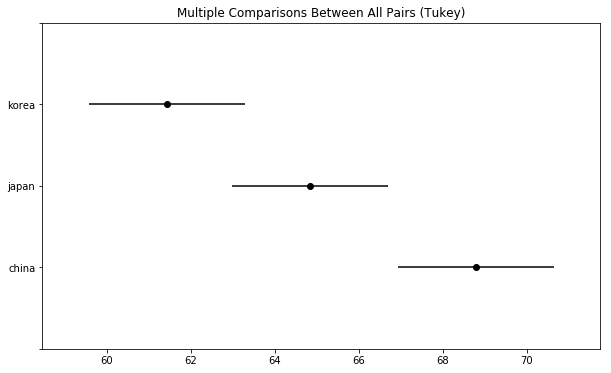

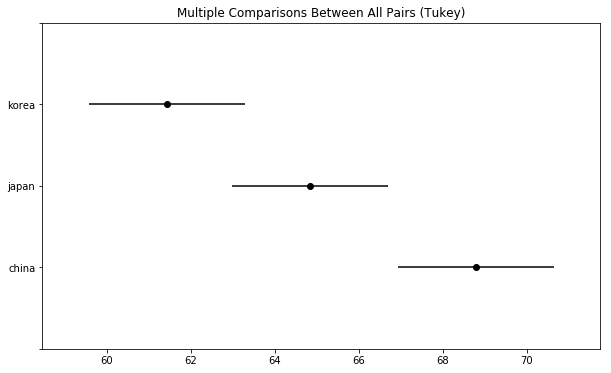

In [12]:
res.plot_simultaneous()

In [13]:
mod = MultiComparison(re, re_label)
results = mod.tukeyhsd(0.01)
results.summary()

group1,group2,meandiff,lower,upper,reject
china,japan,-3.9463,-8.5835,0.691,False
china,korea,-7.3517,-11.989,-2.7145,True
japan,korea,-3.4055,-8.0427,1.2318,False


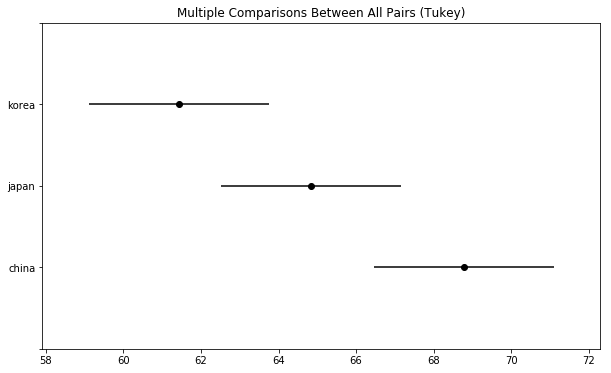

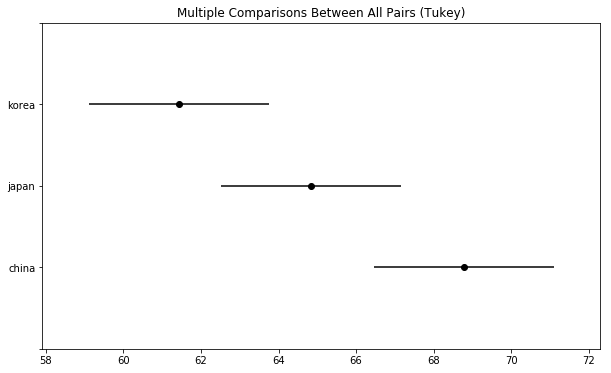

In [14]:
results.plot_simultaneous()

### Two-way ANOVA

In [15]:
sex = pd.DataFrame([round(random.random()) + 1 for _ in range(100)], columns=['sex'])
country = pd.DataFrame([round(random.random() * 2) for _ in range(100)], columns=['country'])
country = country.replace({0: 'korea', 1: 'japan', 2: 'china'})
weight = pd.DataFrame([round(60 + np.random.normal(0, 15) ,1) for _ in range(100)], columns=['weight'])

data = pd.concat([sex, country, weight], axis=1)
data.head()

,sex,country,weight
0,1,korea,56.6
1,2,japan,84.2
2,1,korea,54.4
3,1,china,48.8
4,1,china,90.8


In [16]:
data1 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/tooth_growth_csv')
data1.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [17]:
formula = 'weight ~ C(sex) + C(country) + C(sex):C(country)'
model = smf.ols(formula, data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.3773
Date:                Mon, 26 Feb 2018   Prob (F-statistic):              0.863
Time:                        22:23:20   Log-Likelihood:                -404.35
No. Observations:                 100   AIC:                             820.7
Df Residuals:                      94   BIC:                             836.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          61.4143      3.804     16.146      0.000      53.862      68.967
C(sex)[T.2]                         2.8524      5.289      0.539      0.591      -7.649      13.354
C(country)[T.japan]                -2.8063      4.751     -0.591      0.556     -12.239       6.627
C(country)[T.korea]                 1.1214      5.379      0.208      0.835      -9.559      11.802
C(sex)[T.2]:C(country)[T.japan]     0.8346      6.797      0.123      0.903     -12.661      14.331
C(sex)[T.2]:C(country)[T.korea]    -5.6048      7.702     -0.728      0.469     -20.897       9.688
==============================================================================
Omnibus:                        1.721   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.310
Skew:                           0.006   Prob(JB):                        0.519
Kurtosis:                       2.439   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
aov_table = ss.anova.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(sex),77.444182,1.0,0.382333,0.537853
C(country),111.073577,2.0,0.274179,0.760802
C(sex):C(country),181.466374,2.0,0.447939,0.640300
Residual,19040.347186,94.0,NaN,NaN


In [19]:
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = smf.ols(formula, data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    len   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     41.56
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           2.50e-17
Time:                        22:23:20   Log-Likelihood:                -159.35
No. Observations:                  60   AIC:                             330.7
Df Residuals:                      54   BIC:                             343.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       13.2300      1.148     11.521      0.000      10.928      15.532
C(supp)[T.VC]                   -5.2500      1.624     -3.233      0.002      -8.506      -1.994
C(dose)[T.1.0]                   9.4700      1.624      5.831      0.000       6.214      12.726
C(dose)[T.2.0]                  12.8300      1.624      7.900      0.000       9.574      16.086
C(supp)[T.VC]:C(dose)[T.1.0]    -0.6800      2.297     -0.296      0.768      -5.285       3.925
C(supp)[T.VC]:C(dose)[T.2.0]     5.3300      2.297      2.321      0.024       0.725       9.935
==============================================================================
Omnibus:                        0.336   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.846   Jarque-Bera (JB):                0.324
Skew:                           0.164   Prob(JB):                        0.850
Kurtosis:                       2.852   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
aov_table = ss.anova.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(supp),205.350000,1.0,15.571979,2.311828e-04
C(dose),2426.434333,2.0,91.999965,4.046291e-18
C(supp):C(dose),108.319000,2.0,4.106991,2.186027e-02
Residual,712.106000,54.0,NaN,NaN
